In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Generate some synthetic data
x = np.random.randn(100, 50)
w = np.random.randn(50, 10)
y_prob = np.exp(np.dot(x, w)); y_norm = np.sum(y_prob, axis=1)
y_prob = np.apply_along_axis(lambda x : x / y_norm, 0, y_prob)

def draw(probs):
    y = np.zeros(np.shape(probs))
    for i in np.arange(np.shape(probs)[0]):
        idx = np.random.choice(len(probs[i,:]), 1, p=probs[i,:])
        y[i,idx] = 1
    return y

y = draw(y_prob)

In [3]:
# Build the model
sess = tf.Session()

X = tf.placeholder(tf.float32, [None, 50])
Y_obs = tf.placeholder(tf.float32)

W = tf.Variable(tf.random_normal([50, 10]))
B = tf.Variable(tf.zeros([10]))
    
Y = tf.nn.softmax(tf.matmul(X, W) + B)

loss = -tf.reduce_sum(tf.log(Y) * Y_obs)
optimizer = tf.train.AdamOptimizer()
minimize_op = optimizer.minimize(loss)
saver = tf.train.Saver()

In [4]:
# Run training
sess.run(tf.global_variables_initializer())

loss_his = []

for epoch in np.arange(1,1000+1):
    cur_loss, _ = sess.run([loss, minimize_op], 
                           feed_dict={X: x, Y_obs: y})
    loss_his.append(cur_loss)
    if epoch % 100 == 0:
        print "Epoch {0}; current loss is {1}.".format(epoch, cur_loss)
        saver.save(sess, "/tmp/tmpfhA5bU/logistic-python", global_step=epoch)

Epoch 100; current loss is 795.039428711.
Epoch 200; current loss is 618.680786133.
Epoch 300; current loss is 468.441741943.
Epoch 400; current loss is 347.277404785.
Epoch 500; current loss is 250.257247925.
Epoch 600; current loss is 175.018173218.
Epoch 700; current loss is 119.744552612.
Epoch 800; current loss is 77.8625030518.
Epoch 900; current loss is 46.7542686462.
Epoch 1000; current loss is 28.6555595398.


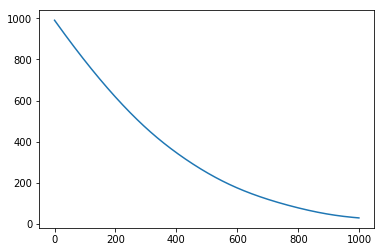

In [5]:
plt.plot(loss_his)